In [60]:
from tensorflow.keras import models, layers, regularizers, Input
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

#### EXERCÍCIO 1 – CLASSIFICAÇÃO MULTICLASSE

Dataset: Wine Dataset (UCI)

1. Treinar uma rede neural em Keras para classificar vinhos em 3 classes.

- Configuração mínima: 2 camadas ocultas com 32 neurônios cada, função de ativação ReLU.
- Camada de saída com 3 neurônios, função de ativação Softmax.
- Função de perda: categorical_crossentropy.
- Otimizador: Adam.

2. Comparar os resultados com um modelo do scikit-learn (RandomForestClassifier ou
   LogisticRegression).
3. Registrar métricas de acurácia e discutir qual modelo teve melhor desempenho.


In [61]:
lista = [
    " Alcohol",
    " Malic acid",
    " Ash",
    " Alcalinity of ash  ",
    " Magnesium",
    " Total phenols",
    " Flavanoids",
    " Nonflavanoid phenols",
    " Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline            ",
]

lista = [x.strip() for x in lista]
lista

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [62]:
# input de dados

COLUMN_NAMES = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]



df_wine = pd.read_csv("data/wine/wine.data", header=None, names=COLUMN_NAMES)

df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
X = df_wine.drop("Class", axis=1).copy()
y = df_wine["Class"].copy()

scaler = MinMaxScaler()

feature = scaler.fit_transform(np.array(X))
target = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=42, stratify=target
)

y_train = y_train - 1
y_test = y_test - 1

In [65]:
X_train.shape

(142, 13)

In [66]:
model = keras.Sequential(
    [
        Input(shape=(13,)),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dense(32, activation="relu"),
        layers.Dense(3, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [67]:
model_history = model.fit(X_train, y_train, epochs=25, validation_split=0.1)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.1732 - loss: 1.2059 - val_accuracy: 0.3333 - val_loss: 1.1432
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1024 - loss: 1.1501 - val_accuracy: 0.2000 - val_loss: 1.1310
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2992 - loss: 1.1093 - val_accuracy: 0.2000 - val_loss: 1.1244
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4882 - loss: 1.0786 - val_accuracy: 0.2667 - val_loss: 1.1185
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5197 - loss: 1.0502 - val_accuracy: 0.3333 - val_loss: 1.1092
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5591 - loss: 1.0296 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5748 - loss: 1.0117 - val_accuracy: 0.3333 - val_loss: 1.0893
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5748 - loss: 0.9925 - val_accuracy: 0.3333 - val_loss: 1.0758


In [68]:
# Avaliar no teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no teste: {test_acc:.4f}")

2/2 - 0s - 29ms/step - accuracy: 0.8889 - loss: 0.5601
Acurácia no teste: 0.8889


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


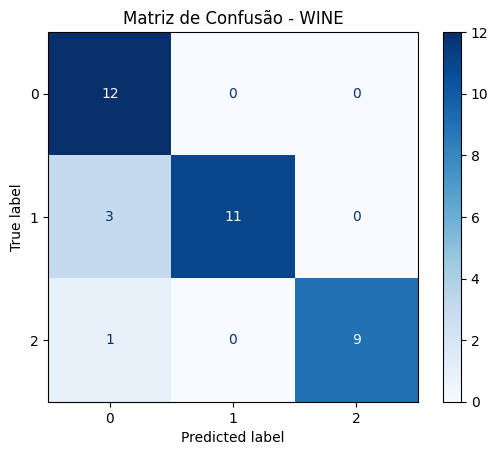

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)   # gera probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)            # pega o dígito mais provável
y_pred

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_nomalize = confusion_matrix(y_test, y_pred, normalize="true") * 100

# Mostrar matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - WINE")
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_train = rf_model.fit(X_train, y_train)

In [71]:
rf_train.score(X_test, y_test)

1.0

- Ambos os modelos tiveram bom desempenho, mas o Random Forest atingiu acurácia perfeita (1.0) nos dados de teste, enquanto a Rede Neural obteve 0.9722.
- Aparentemente, em conjuntos de dados menores e mais simples, o Random Forest possui desempenho maior que a rede neural.

> Com o treino usando 30 épocas temos também um modelo ideal com acurácia = 1.0 

---

#### EXERCÍCIO 2 – REGRESSÃO

Dataset: California Housing Dataset (Scikit-learn)

1. Treinar uma rede neural em Keras para prever o valor médio das casas.

- Configuração mínima: 3 camadas ocultas com 64, 32 e 16 neurônios, função de ativação ReLU.
- Camada de saída com 1 neurônio, função de ativação Linear.
- Função de perda: mse.
- Otimizador: Adam.

2. Comparar os resultados com um modelo do scikit-learn (LinearRegression ou
   RandomForestRegressor).
3. Registrar métricas de erro (RMSE ou MAE) e discutir qual modelo teve melhor desempenho


In [72]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [113]:
housing_feature = scaler.fit_transform(housing.data)
housing_target = housing.target

In [106]:
print(housing_feature.shape)
print(housing_target.shape)

(20640, 8)
(20640,)


In [118]:
x_housing_train, x_housing_test, y_housing_train, y_housing_test = train_test_split(
    housing_feature,
    housing_target,
    test_size=0.2,
    random_state=42,
)

In [124]:
x_housing_train[0]

array([0.19032151, 0.62745098, 0.02957193, 0.01995318, 0.06437961,
       0.00241382, 0.01806589, 0.72908367])

In [125]:
y_housing_train[0]

np.float64(1.03)

In [132]:
housing_model = keras.Sequential(
    [
        Input(shape=(8,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1),
    ]
)

housing_model.compile(
    optimizer="adam", loss="mse", metrics=["mae"]
)

In [134]:
housing_history = housing_model.fit(x_housing_train, y_housing_train, epochs=50, validation_split=0.1)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4916 - mae: 0.4843 - val_loss: 0.5576 - val_mae: 0.4824
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4791 - mae: 0.4754 - val_loss: 0.5138 - val_mae: 0.4742
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4734 - mae: 0.4719 - val_loss: 0.5011 - val_mae: 0.4833
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4679 - mae: 0.4676 - val_loss: 0.4973 - val_mae: 0.4630
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4647 - mae: 0.4664 - val_loss: 0.5211 - val_mae: 0.5297
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4679 - mae: 0.4692 - val_loss: 0.4873 - val_mae: 0.4727
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4584 - mae: 0.4625 - val_loss: 0.4852 - val_mae: 0.4719
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4528 - mae: 0.4597 - val_loss: 0.4878 - val_mae: 0.4541
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Previsões
y_pred = housing_model.predict(x_housing_test)

# Erros
mse = mean_squared_error(y_housing_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_housing_test, y_pred)

print(f"Rede Neural - RMSE: {rmse:.4f}, MAE: {mae:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rede Neural - RMSE: 0.6322, MAE: 0.4512


In [140]:
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_train = ln_model.fit(x_housing_train, y_housing_train)

In [141]:
ln_train.score(x_housing_test, y_housing_test)

0.5757877060324512

In [143]:
# Previsões
y_pred = ln_train.predict(x_housing_test)

# Erros
mse = mean_squared_error(y_housing_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_housing_test, y_pred)

print(f"Regressão linear - RMSE: {rmse:.4f}, MAE: {mae:.4f}")


Regressão linear - RMSE: 0.7456, MAE: 0.5332


Ao se comparar uma Rede Neural com regressão linear utilizando o California Housing Dataset, percebemos que, a rede tem apresentado um desempenho ligeiramente melhor (RMSE: 0.63, MAE: 0.45) em relação à regressão linear (RMSE: 0.74, MAE: 0.53), nenhum dos dois modelos teve uma performance realmente satisfatória.

Embora, as métricas sejam parecidas, RMSE e MSE, temos que para um bom modelos elas tem de se `aproximar de 0`. 
Outra métrica que temos é de R^2 = 0,5758 para a regressão linear, indicando que aquele modelo explica apenas metade da variação na variável

--- 

## Parte 02 - Visão Computacional

### 2.1 Roboflow

In [ ]:
!pip install roboflow     

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="FXqaU8du4cqTJhwiG8vo")
project = rf.workspace("myfiap-ut6gb").project("monster-bn5fz-nuvug")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
!pip install inference-sdk

---

![image-01](data\monster\monster-01.jpg)

In [23]:
# 1. Import the library
from inference_sdk import InferenceHTTPClient

# 2. Connect to your workflow
client = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="FXqaU8du4cqTJhwiG8vo"
)

# 3. Run your workflow on an image
result = client.run_workflow(
    workspace_name="myfiap-ut6gb",
    workflow_id="detect-count-and-visualize",
    images={
        "image": "data\monster\monster-01.jpg" # Path to your image file
    },
    use_cache=True # Speeds up repeated requests
)

# 4. Get your results
for key, value in result[0].items():
    print(f"{key}: {value}\n")


count_objects: 6

output_image: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADjAN4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/K/Lr/gtn/ydV4f/AOyfWn/pdfV+otflx/wUf8O+LPj7+2R8QLO2vtL0+w+Fnw6h1Geee3u2kk06KKG6lOyGOZ5JvMv3wAqjYgzyCW/VPB+vQwfFU8ZXmoU6VKcpSeyV4xv98kfQ

--- 

![image-02](data\monster\monster-02.jpg)

In [24]:
# 3. Run your workflow on an image
result = client.run_workflow(
    workspace_name="myfiap-ut6gb",
    workflow_id="detect-count-and-visualize",
    images={
        "image": "data\monster\monster-02.jpg" # Path to your image file
    },
    use_cache=True # Speeds up repeated requests
)

# 4. Get your results
for key, value in result[0].items():
    print(f"{key}: {value}\n")


count_objects: 4

output_image: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADhAOEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3b/gqb/yfh47/AO4X/wCmu0r59r6C/wCCpv8Ayfh47/7hf/prtK+fa/vng7/kkcu/68Uf/TcT9fyz/kW0f8EfyQUUUV9GdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFA

### 2.2 YOLOv8

In [ ]:
!pip install ultralytics roboflow

In [ ]:

from roboflow import Roboflow
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

model.train(data=dataset.location + "/data.yaml", epochs=20, imgsz=640)

metrics = model.val()


In [20]:
# As métricas principais do YOLOv8
mp, mr, map50, map95 = metrics.mean_results() 

print(f"Precisão média (mp): {mp:.3f}")
print(f"Recall médio (mr): {mr:.3f}")
print(f"mAP@0.5: {map50:.3f}")
print(f"mAP@0.5:0.95: {map95:.3f}")


Precisão média (mp): 0.974
Recall médio (mr): 1.000
mAP@0.5: 0.993
mAP@0.5:0.95: 0.957


In [ ]:
model.export(format="onnx")  

--- 

![image-02](data\monster\monster-01.jpg)

In [25]:
results = model.predict(source="data\monster\monster-01.jpg", show=True)

print(results)


image 1/1 c:\Users\xfran\Desktop\2TDSPV\Entrega-CheckPoint\IOT-IOB-GENERATIVE-IA-CP05\data\monster\monster-01.jpg: 640x640 6 --------355MLs, 179.2ms
Speed: 4.7ms preprocess, 179.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '--------355ML'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [2

--- 

![image-02](data\monster\monster-02.jpg)

In [26]:
results = model.predict(source="data\monster\monster-02.jpg", show=True)

print(results)


image 1/1 c:\Users\xfran\Desktop\2TDSPV\Entrega-CheckPoint\IOT-IOB-GENERATIVE-IA-CP05\data\monster\monster-02.jpg: 640x640 5 --------355MLs, 203.4ms
Speed: 6.3ms preprocess, 203.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '--------355ML'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [2